In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 127.5 - 1, test_images / 127.5 - 1


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.35),
    layers.Dense(10, activation='softmax')
])

In [4]:
model.compile(optimizer=Adam(learning_rate=0.0002), 
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/20
1250/1250 [==============================] - 21s 16ms/step - loss: 1.8167 - accuracy: 0.3417 - val_loss: 1.3605 - val_accuracy: 0.5231
Epoch 2/20
1250/1250 [==============================] - 21s 17ms/step - loss: 1.3249 - accuracy: 0.5261 - val_loss: 1.1752 - val_accuracy: 0.5909
Epoch 3/20
1250/1250 [==============================] - 20s 16ms/step - loss: 1.1625 - accuracy: 0.5907 - val_loss: 1.0879 - val_accuracy: 0.6180
Epoch 4/20
1250/1250 [==============================] - 20s 16ms/step - loss: 1.0461 - accuracy: 0.6345 - val_loss: 1.0002 - val_accuracy: 0.6559
Epoch 5/20
1250/1250 [==============================] - 20s 16ms/step - loss: 0.9610 - accuracy: 0.6658 - val_loss: 0.9555 - val_accuracy: 0.6685
Epoch 6/20
1250/1250 [==============================] - 21s 16ms/step - loss: 0.9013 - accuracy: 0.6869 - val_loss: 0.9153 - val_accuracy: 0.6838
Epoch 7/20
1250/1250 [==============================] - 22s 17ms/step - loss: 0.8306 - accuracy: 0.7139 - val_loss: 0.8942 -

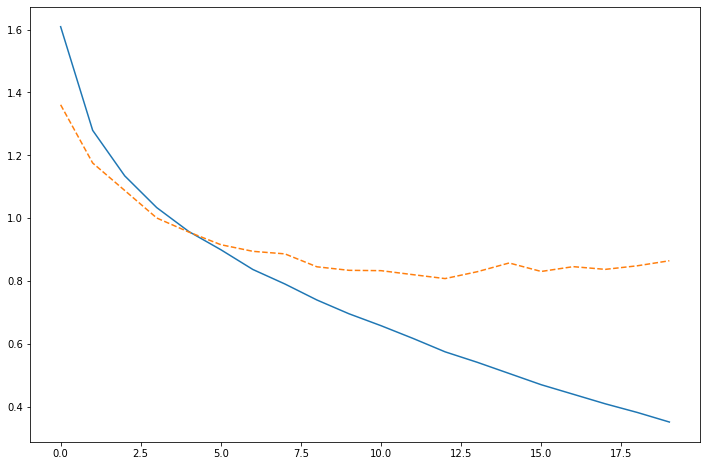

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')
predictions = np.argmax(model.predict(test_images), axis=-1)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(test_labels, predictions)
print("Classification Report:")
print(class_report)

# Calculate precision and recall
precision = precision_score(test_labels, predictions, average='weighted')
recall = recall_score(test_labels, predictions, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")

model.summary()

313/313 [==============================] - 2s 5ms/step - loss: 0.8813 - accuracy: 0.7284
Test accuracy: 0.7283999919891357
Confusion Matrix:
[[743  11  61  29  22   2  11  12  73  36]
 [ 20 819  14  14   5   5   9   1  25  88]
 [ 55   7 667  72  69  44  41  27  11   7]
 [ 22  12  91 615  53 110  44  25  16  12]
 [ 19   3 108  75 686  19  35  39  12   4]
 [  9   2  86 216  33 572  23  43  11   5]
 [  5   3  61  69  33  16 790   5   8  10]
 [ 13   4  55  42  67  49   4 751   3  12]
 [ 54  26  10  21   5   5   4   5 843  27]
 [ 28  70  16  19   6   8   9  14  32 798]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1000
           1       0.86      0.82      0.84      1000
           2       0.57      0.67      0.62      1000
           3       0.52      0.61      0.57      1000
           4       0.70      0.69      0.69      1000
           5       0.69      0.57      0.63      1000
           6       0.81   

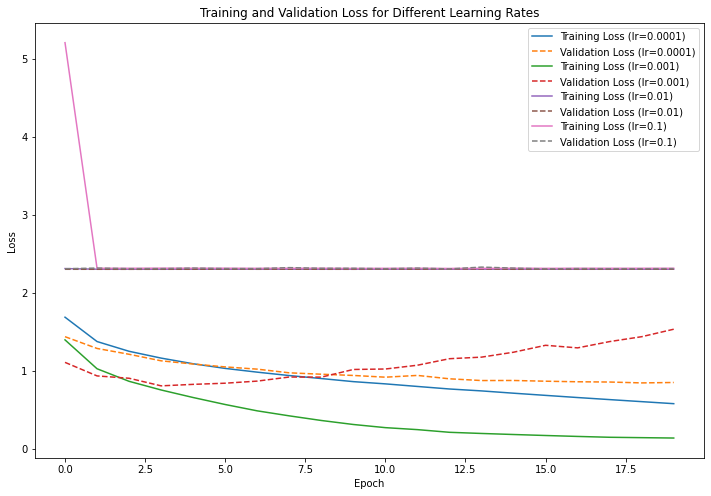

In [9]:
import matplotlib.pyplot as plt

learning_rates = [0.0001, 0.001, 0.01, 0.1]
history_dict = {}

for lr in learning_rates:
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.25),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2, verbose=0)
    
    history_dict[f'lr_{lr}'] = {
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }

# Plotting
plt.figure(figsize=(12, 8))

for lr in learning_rates:
    plt.plot(history_dict[f'lr_{lr}']['train_loss'], label=f'Training Loss (lr={lr})')
    plt.plot(history_dict[f'lr_{lr}']['val_loss'], label=f'Validation Loss (lr={lr})', linestyle='--')

plt.title('Training and Validation Loss for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()